In [1]:
%pylab inline
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats
from MTD import *
import brewer2mpl
from scipy.stats.mstats import zscore as zscore
import scipy  
import scikits.bootstrap as bootstrap  

Populating the interactive namespace from numpy and matplotlib


## read data

In [2]:
#read data
%run /home/despoB/kaihwang/bin/TDSigEI/MTD/dataframe_ts.py
#TS_df = pd.read_csv('../Data/TS_FIRReg_df.csv')
TS_df.head()

,Time,Subject,Condition,Dataset,Run,FFA,PPA,VC
0,1,512,FH,FIR,1,0.000000,0.000000,0.000000
1,2,512,FH,FIR,1,0.000000,0.000000,0.000000
2,3,512,FH,FIR,1,0.000000,0.000000,0.000000
3,4,512,FH,FIR,1,-0.297043,0.325559,0.097943
4,5,512,FH,FIR,1,-0.106275,0.595145,-0.119612


## run MTD

In [25]:
os.chdir('/home/despoB/kaihwang/TRSE/TDSigEI')
Subjects = glob.glob('5*')
Conditions = ['FH', 'Fp', 'HF', 'Hp']
#MotorMapping = [1, 2]
corr_df = pd.DataFrame(columns=['Subj', 'Condition', 'Run','Window', 'MTD-FFA-VC', 'MTD-PPA-VC', 'corr-FFA-VC', 'corr-PPA-VC'], dtype=float)
#'Run', 'FFA-M','FFA-NM', 'PPA-M', 'PPA-NM',
Runs = [1, 2, 3, 4]
#motor mapping 1, RH-Face LH-Scene
#motor mapping 2, RH-Scene, LH-Face

# block start times and TRs:
# 1.50 42.00 82.50 121.50
# 0, 27, 54, 80
TR_index = np.arange(0,102)
TR_index[TR_index!=0] == False 
TR_index[0:15] = True
TR_index[27:42] = True
TR_index[54:69] = True
TR_index[81:96] = True

i=1
for s, sub in enumerate(Subjects):
    for c, cond in enumerate(Conditions):
        for run in Runs:
            PPA_ts = np.array(TS_df[(TS_df['Subject'] == str(sub)) & (TS_df['Condition'] == cond) & (TS_df['Run'] == run)]['PPA'])
            FFA_ts = np.array(TS_df[(TS_df['Subject'] == str(sub)) & (TS_df['Condition'] == cond) & (TS_df['Run'] == run)]['FFA'])
            VC_ts = np.array(TS_df[(TS_df['Subject'] == str(sub)) & (TS_df['Condition'] == cond) & (TS_df['Run'] == run)]['VC'])
            
            # do not include "scrubbed" data points into calculation
            #FFA_ts = FFA_ts[TR_index]
            #PPA_ts = PPA_ts[TR_index]
            #VC_ts = VC_ts[TR_index]
            
            #FFA_ts = FFA_ts[FFA_ts != 0]
            #PPA_ts = PPA_ts[PPA_ts != 0]
            #VC_ts = VC_ts[VC_ts != 0]
            
            for w in np.arange(1,25):
                corr_df.loc[i, 'Condition'] = cond
                corr_df.loc[i, 'Subj'] = sub
                corr_df.loc[i, 'Run'] = run
                corr_df.loc[i, 'Window'] = w
                corr_df.loc[i,'MTD-FFA-VC'] = np.nanmean(coupling(np.array([FFA_ts, VC_ts]).T, w)[1][:,0,1])
                corr_df.loc[i,'MTD-PPA-VC'] = np.nanmean(coupling(np.array([PPA_ts, VC_ts]).T, w)[1][:,0,1])
                
                sT = pd.rolling_mean(np.array([FFA_ts, VC_ts]).T,w, center = True)
                sT[np.isnan(sT)] = 0
                corr_df.loc[i,'corr-FFA-VC'] = np.corrcoef(sT.T)[0,1]
                
                sT = pd.rolling_mean(np.array([PPA_ts, VC_ts]).T,w, center = True)
                sT[np.isnan(sT)] = 0
                corr_df.loc[i,'corr-PPA-VC'] = np.corrcoef(sT.T)[0,1]
                
                i = i+1
             

/srv/local/anaconda-2.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:46: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/srv/local/anaconda-2.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:50: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


In [31]:
corr_df

,Subj,Condition,Run,Window,MTD-FFA-VC,MTD-PPA-VC,corr-FFA-VC,corr-PPA-VC
1,512,FH,1.0,1.0,0.190104,0.453002,0.256993,0.407293
2,512,FH,1.0,2.0,0.184531,0.423879,0.297900,0.349807
3,512,FH,1.0,3.0,0.183879,0.416830,0.331314,0.376312
4,512,FH,1.0,4.0,0.185311,0.414863,0.345972,0.435665
5,512,FH,1.0,5.0,0.187906,0.416108,0.360002,0.507317
6,512,FH,1.0,6.0,0.190976,0.414568,0.368862,0.581297
7,512,FH,1.0,7.0,0.194318,0.413804,0.388678,0.652903
8,512,FH,1.0,8.0,0.197303,0.412387,0.417233,0.718746
9,512,FH,1.0,9.0,0.198868,0.412661,0.441964,0.758334
10,512,FH,1.0,10.0,0.200984,0.414328,0.467987,0.768207


## plot group averaged MTD

In [33]:
# get mean and std
stat_df = corr_df.groupby(['Subj','Condition','Window']).mean().reset_index()
mean_df = stat_df.groupby(['Condition','Window']).mean().reset_index()
sem_df = stat_df.groupby(['Condition','Window']).sem().reset_index()
stat_df.groupby(['Subj','Condition']).mean().reset_index().to_csv('/home/despoB/kaihwang/bin/TDSigEI/Data/meanMTD.csv')


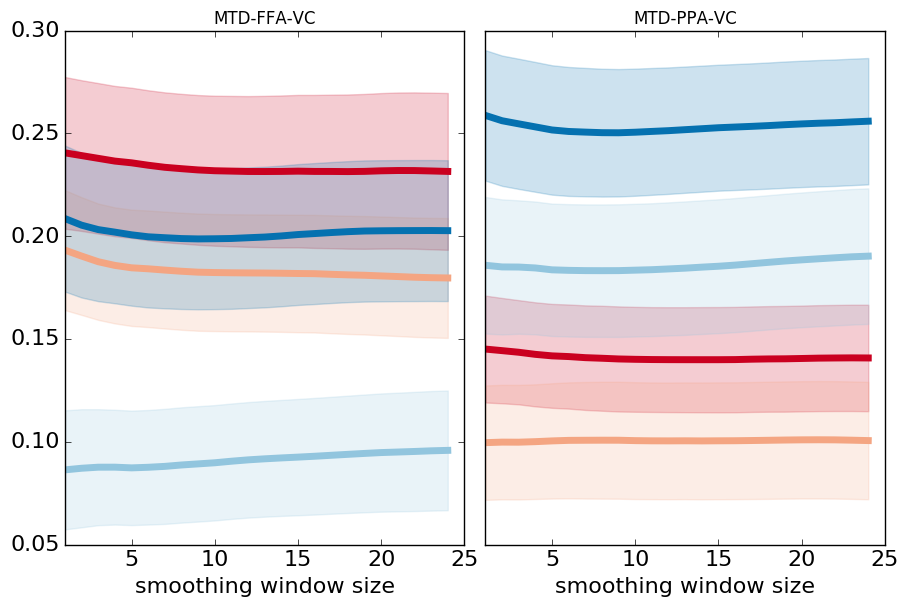

In [34]:
#plot
plt.rc('xtick', labelsize=16)  
plt.rc('ytick', labelsize=16) 
ROIpairs = ['MTD-FFA-VC', 'MTD-PPA-VC']
Conditions =['FH', 'Fp', 'Hp', 'HF']
Labels = ['Face with scene distractor', 'Passively viewing faces ', 'Passively viewing scenes', 'Scene with face distractor']
x = np.arange(1,25)
#get colormap
cmap = brewer2mpl.get_map('RdBu','diverging', 4)
plt.figure(1)
plt.figure(figsize=(9,6))
#plt.suptitle('FIR regression', fontsize=14, fontweight='bold')
for r, roi in enumerate(ROIpairs):
    ax=plt.subplot(1, 2, r+1)
    
    for i, c in enumerate(Conditions):
        y = np.array(mean_df[(mean_df['Condition'] == c)][roi])
        #CIs = bootstrap.ci(y, scipy.mean)  
        error = np.array(sem_df[(mean_df['Condition'] == c)][roi])
        plt.plot(x, y, color = cmap.hex_colors[i], linewidth=5  )
        ax.set_title(roi)
        plt.fill_between(x, y+1*error, y-1*error, alpha=0.2, edgecolor=cmap.hex_colors[i], 
                     facecolor=cmap.hex_colors[i], label=c)

        #plt.ylim(-0.05,0.3)
        plt.xlim(1, 25)
        plt.xlabel('smoothing window size', fontsize=16)
        if r ==1:
            ax.yaxis.set_visible(False)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.legend(Labels, fontsize=14, loc='outside', bbox_to_anchor=(1, 1))
#plt.show()

plt.savefig('/home/despoB/kaihwang/bin/TDSigEI/FIRreg_corr_lags1-25.pdf',bbox_inches='tight')

In [34]:
cmap.hex_colors

['#CA0020', '#F4A582', '#92C5DE', '#0571B0']

In [30]:
# organize csv

sumdf = stat_df[stat_df["Window"]==15]
sumdf['Category'] = 'Faces'
sumdf.loc[sumdf['Condition'] == 'HF','Category'] = 'Buildings'
sumdf.loc[sumdf['Condition'] == 'Hp','Category'] = 'Buildings'
#FIR_df[FIR_df['Condition'] == 'Hp']['Category'] ='Buildings'
#FIR_df[FIR_df['Condition'] == 'Ho']['Category'] ='Buildings'

sumdf['Task'] = '0Back'
sumdf.loc[sumdf['Condition'] == 'HF','Task'] ='1Back'
sumdf.loc[sumdf['Condition'] == 'FH','Task'] ='1Back'

sumdf.to_csv('/home/despoB/kaihwang/bin/TDSigEI/Data/MTD.csv')


/srv/local/anaconda-2.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/srv/local/anaconda-2.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## plot indiv subject

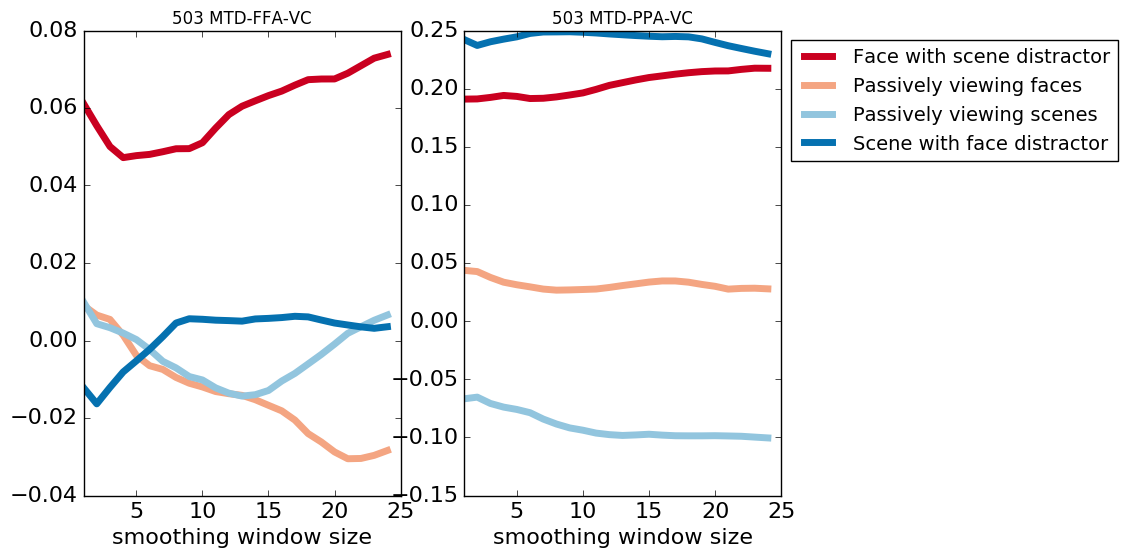

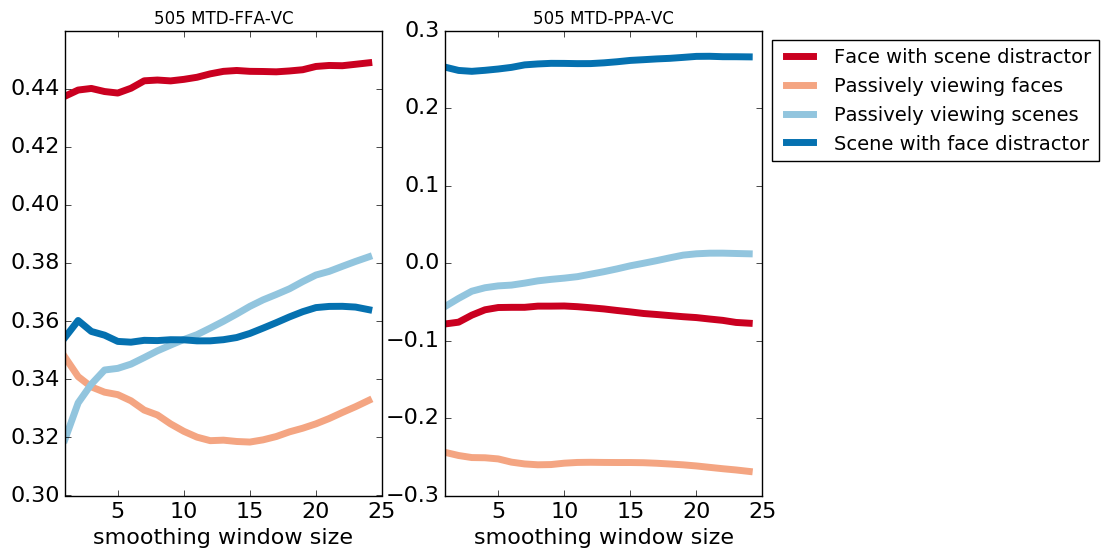

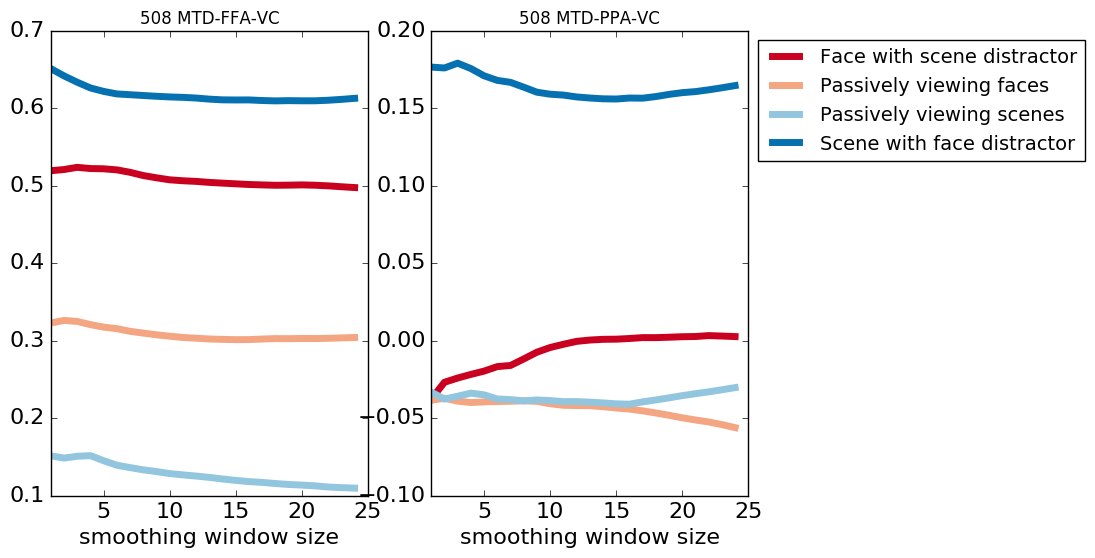

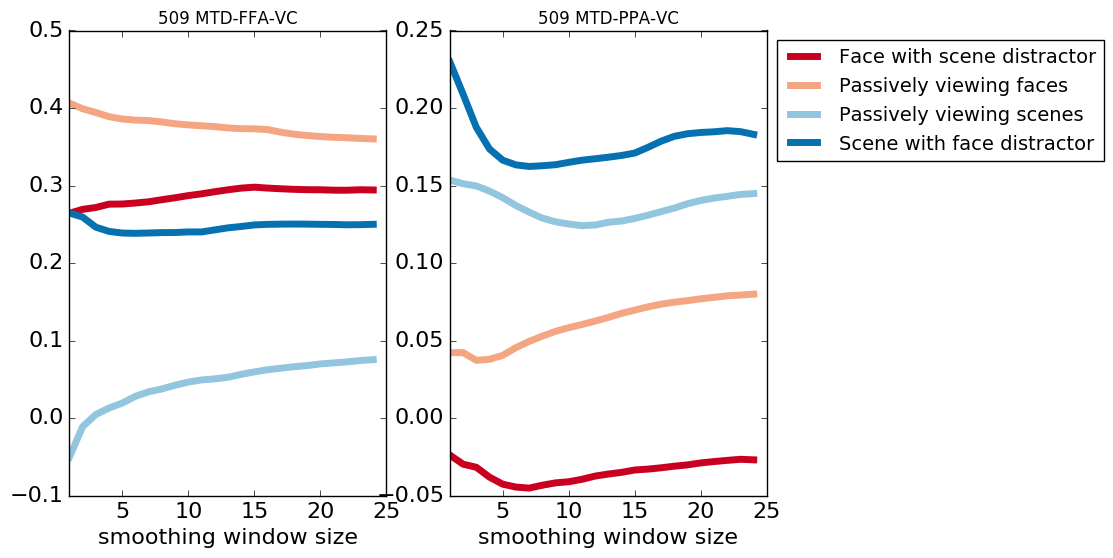

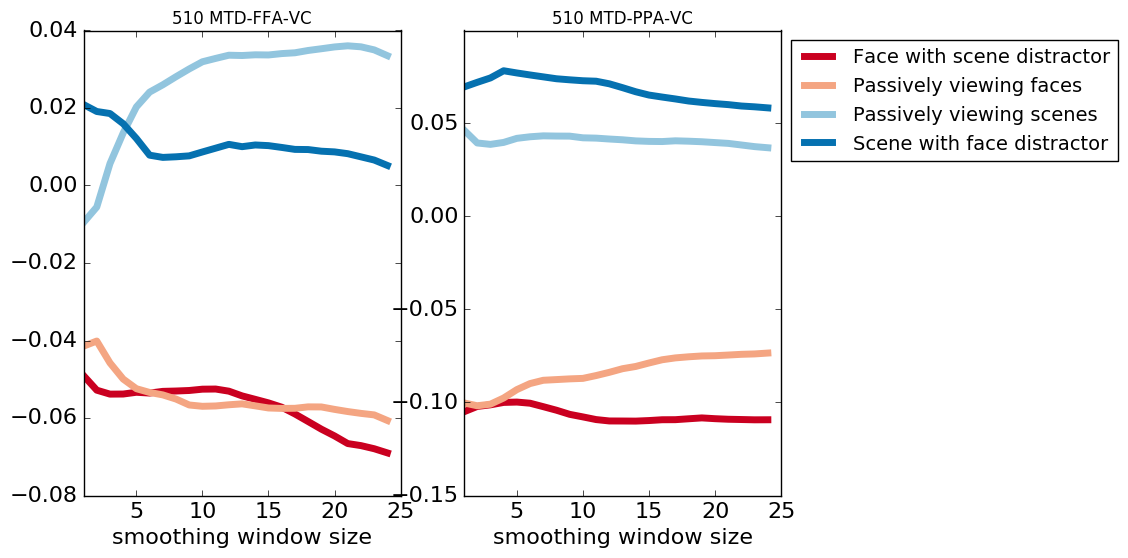

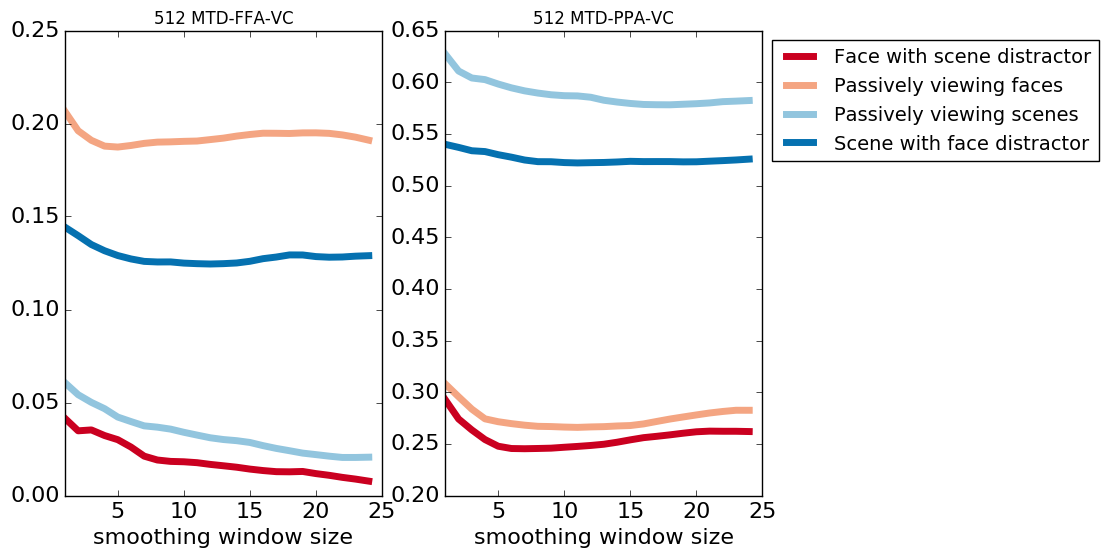

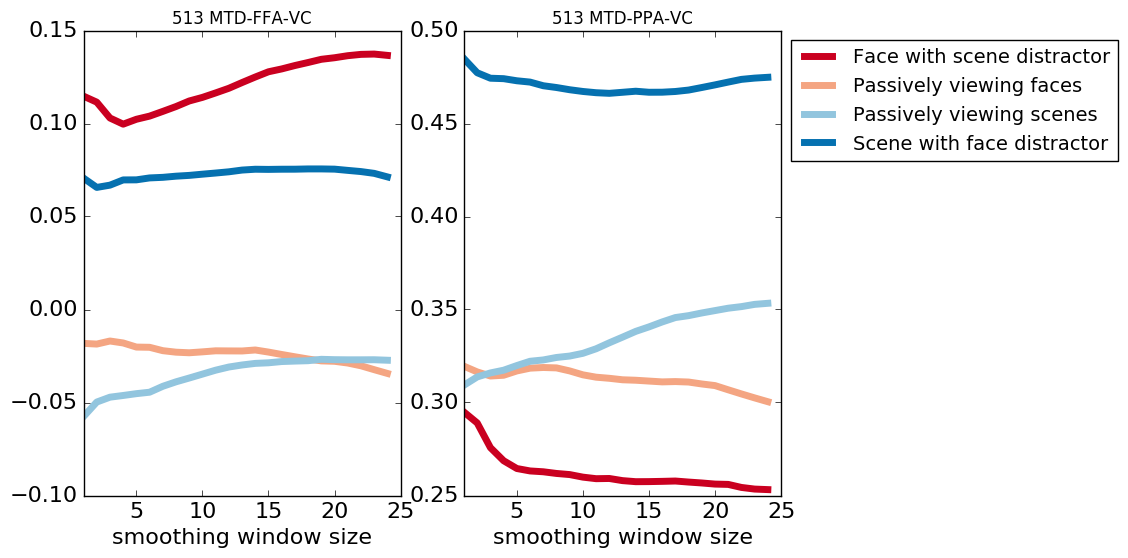

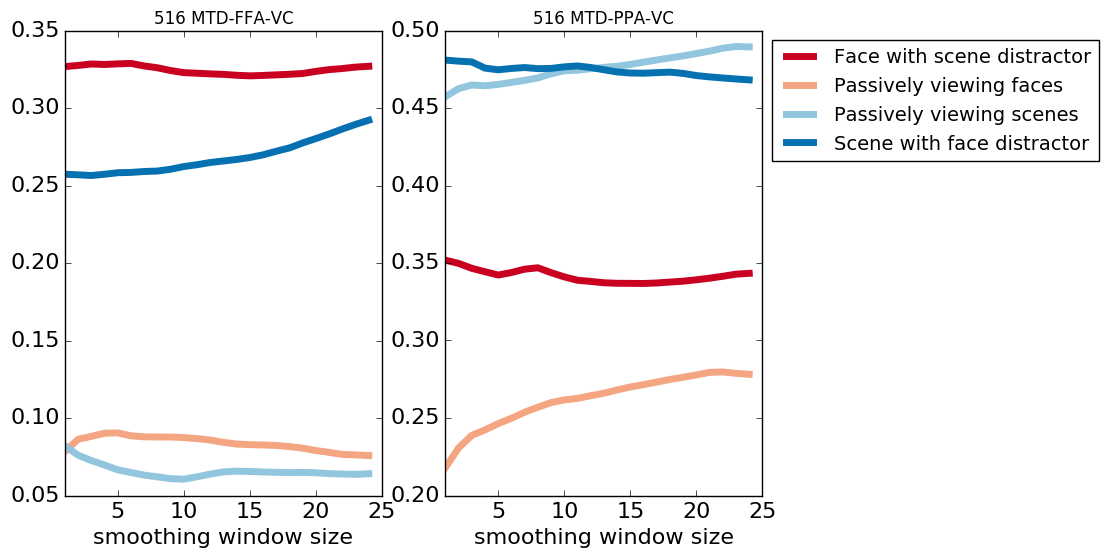

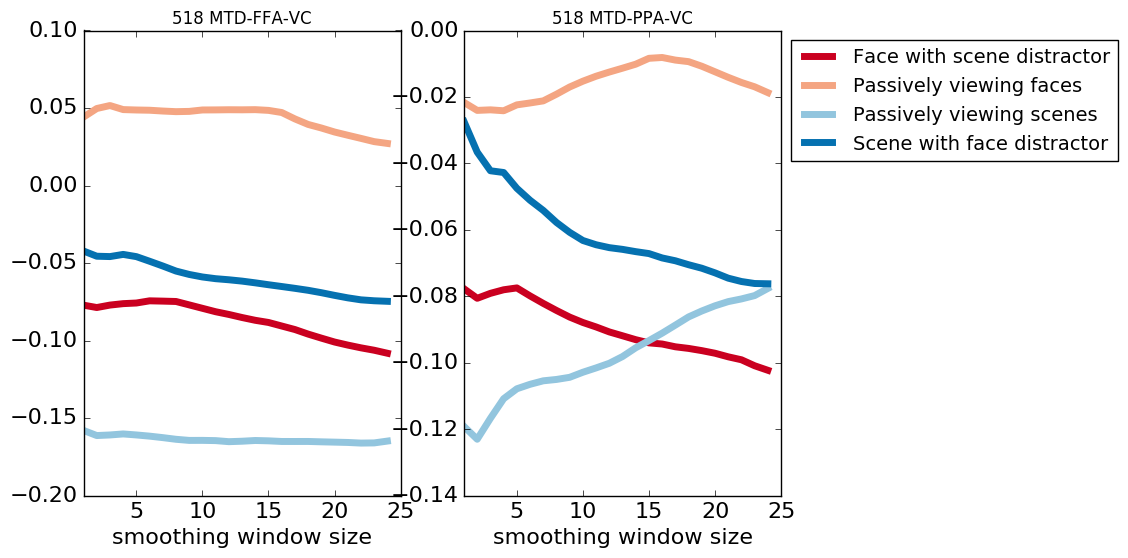

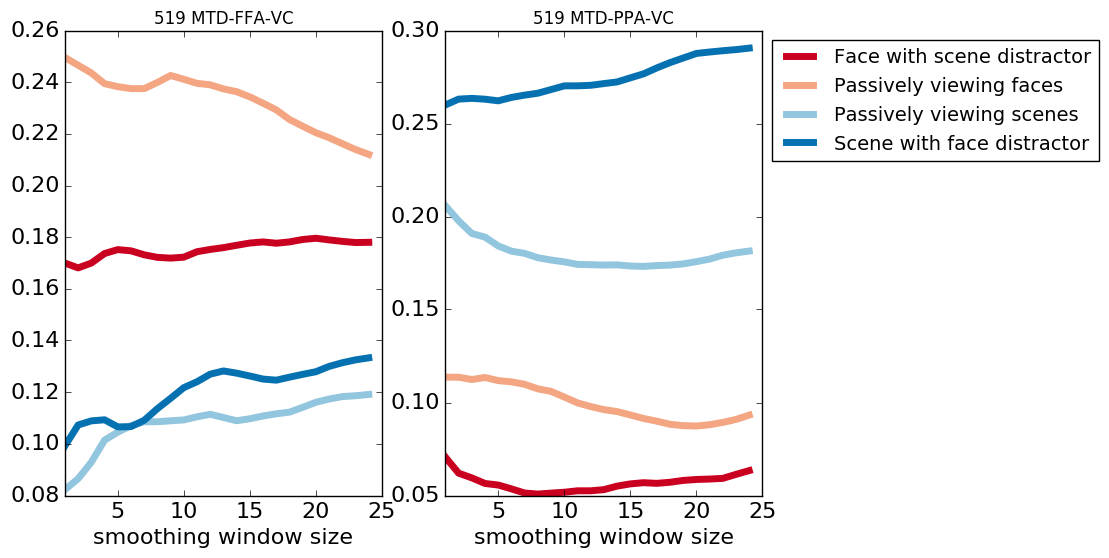

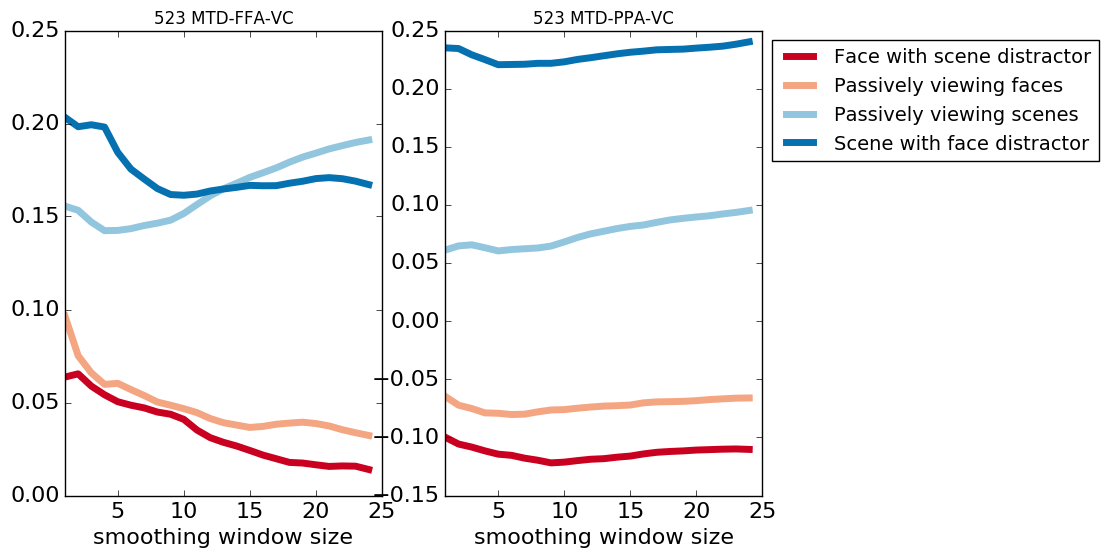

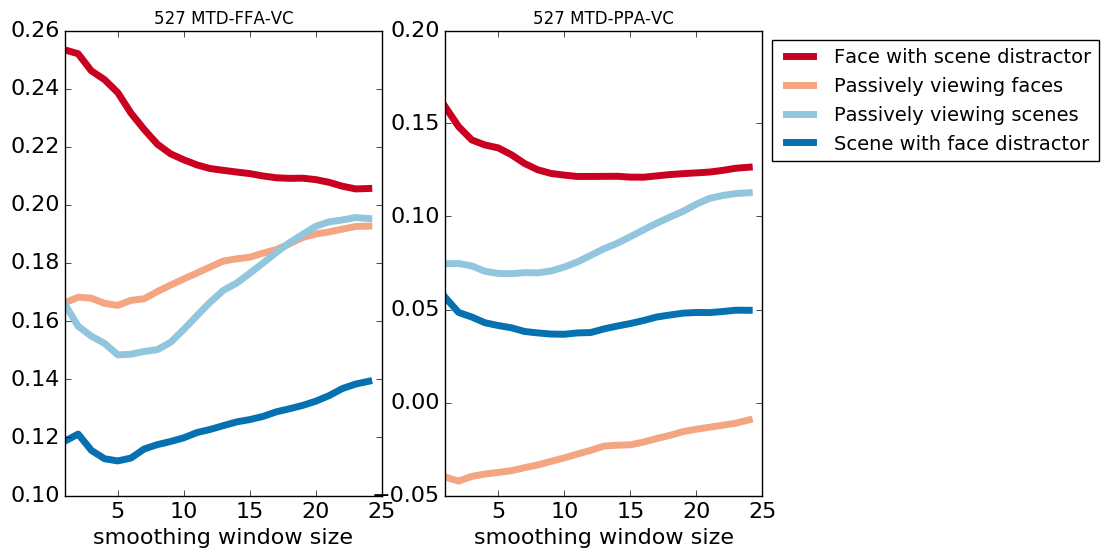

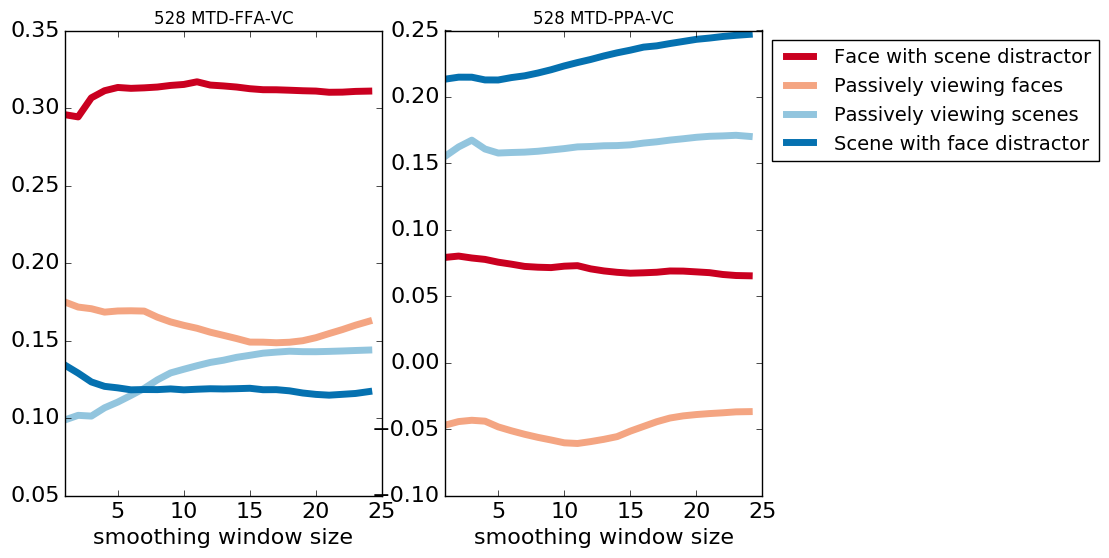

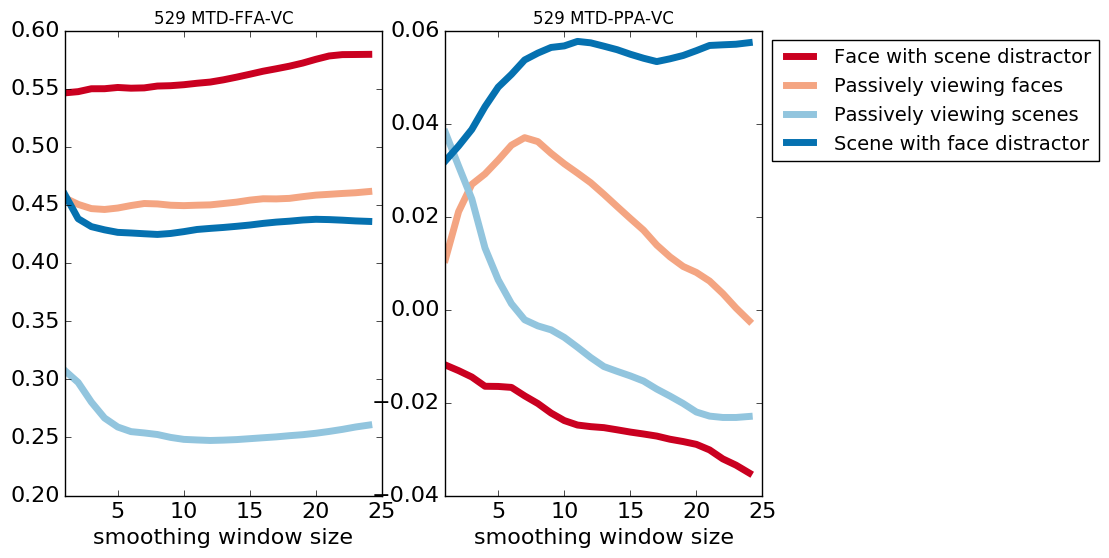

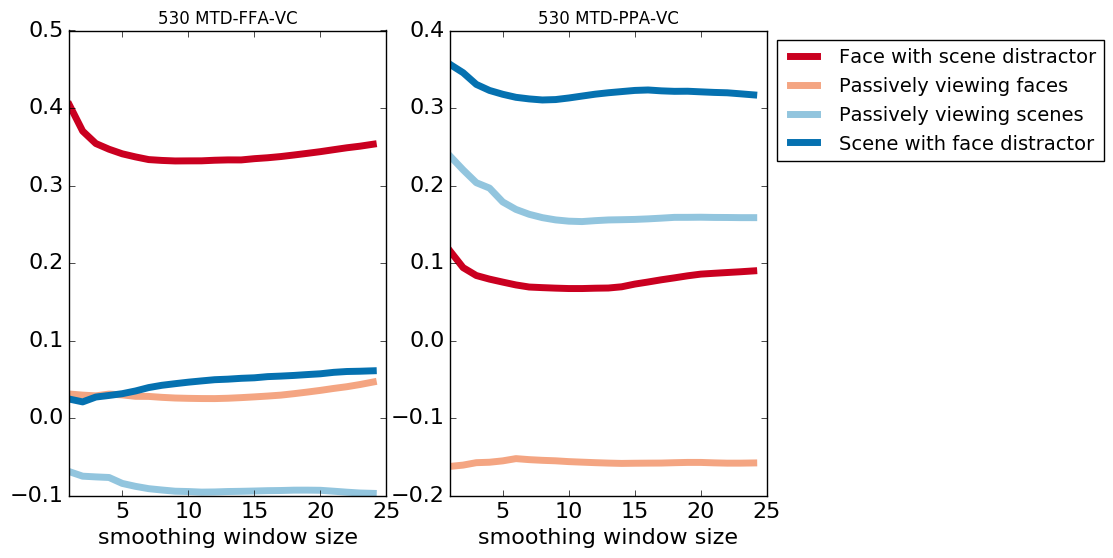

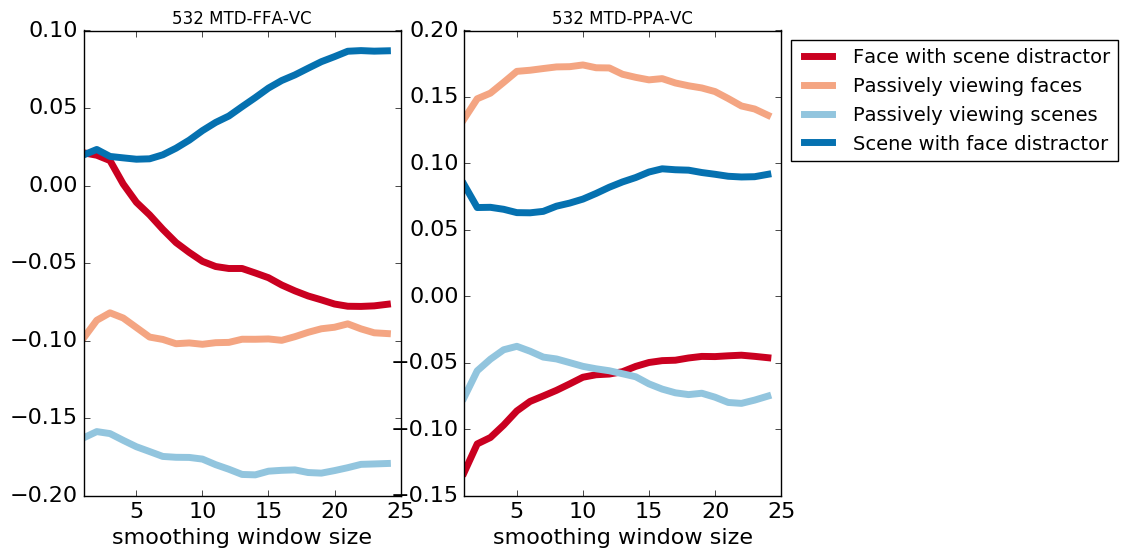

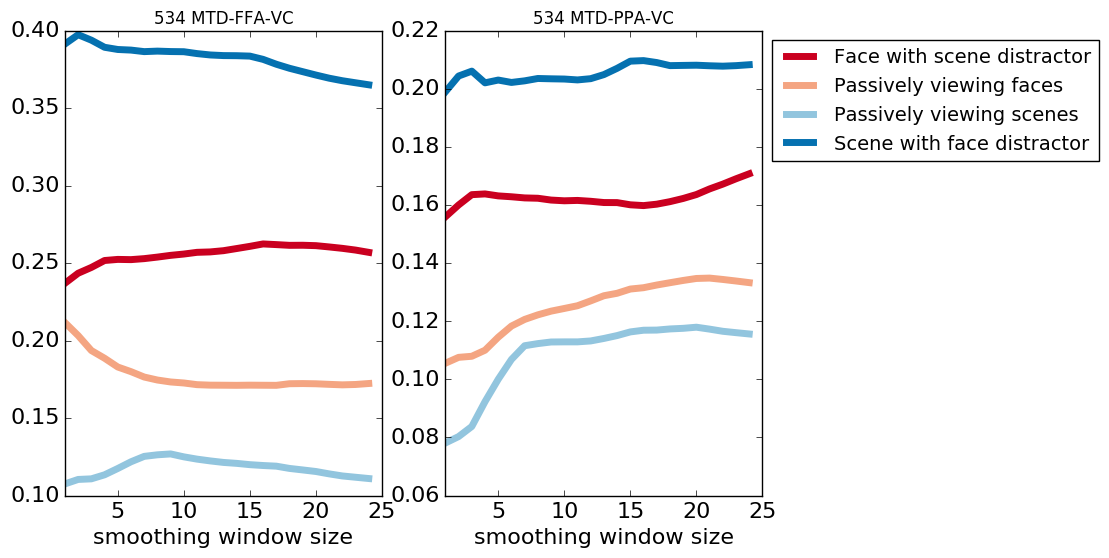

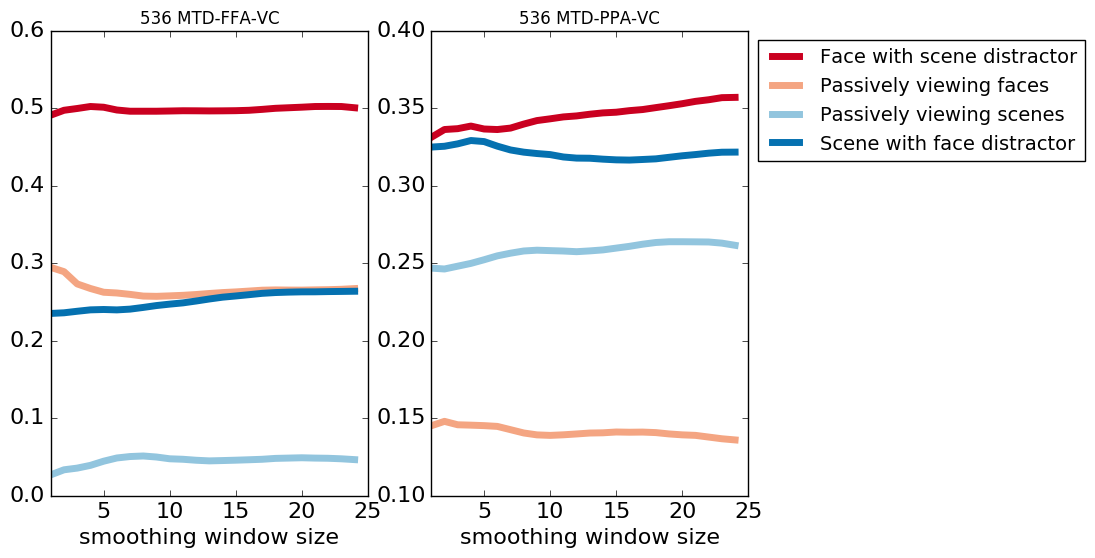

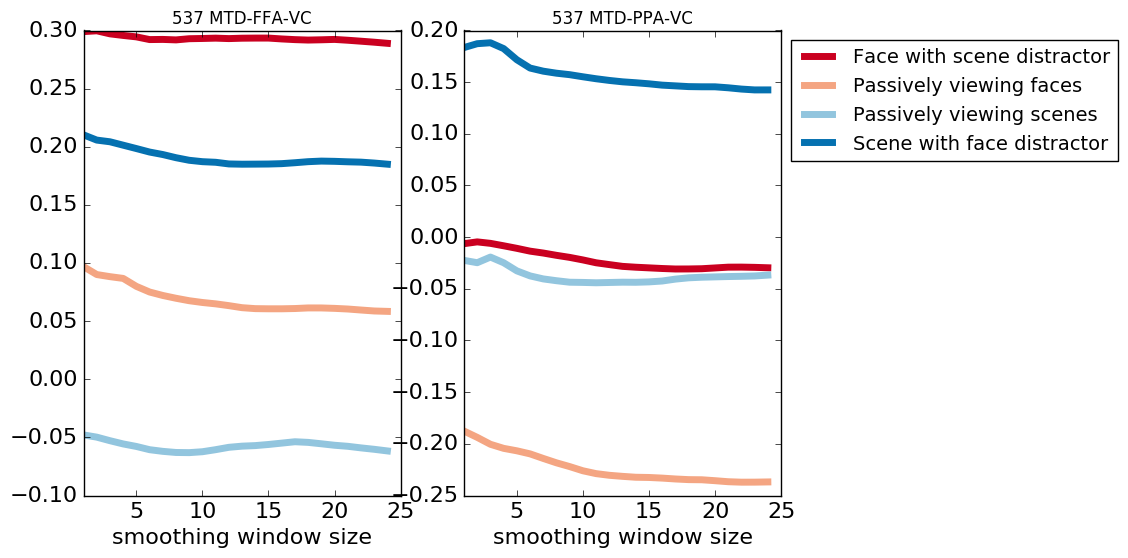

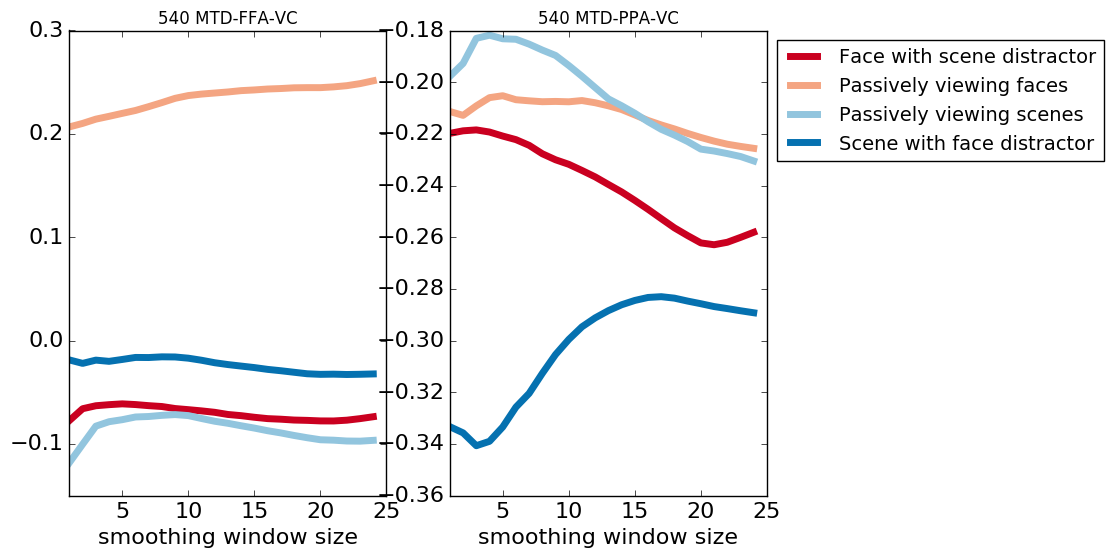

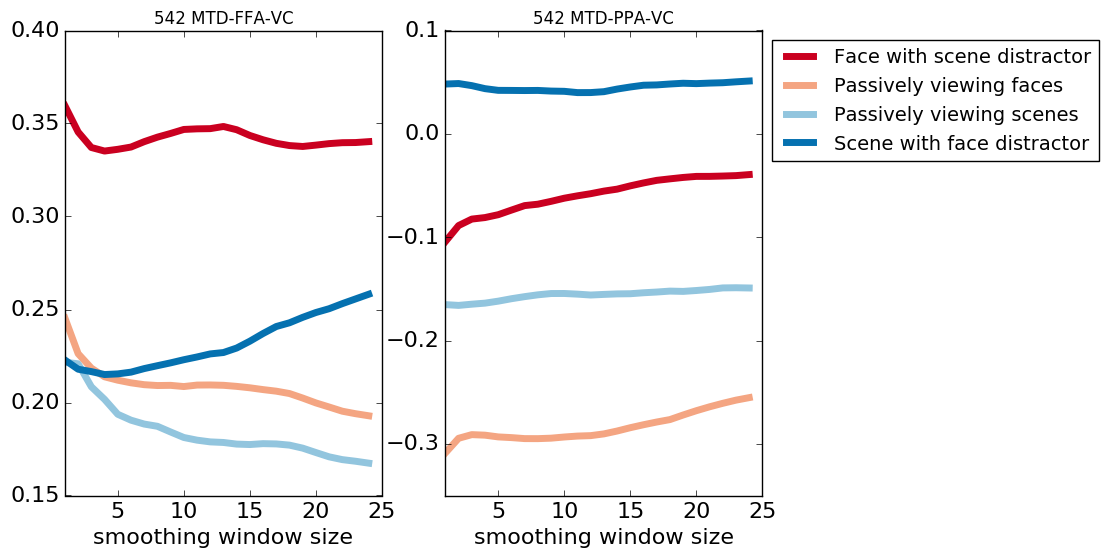

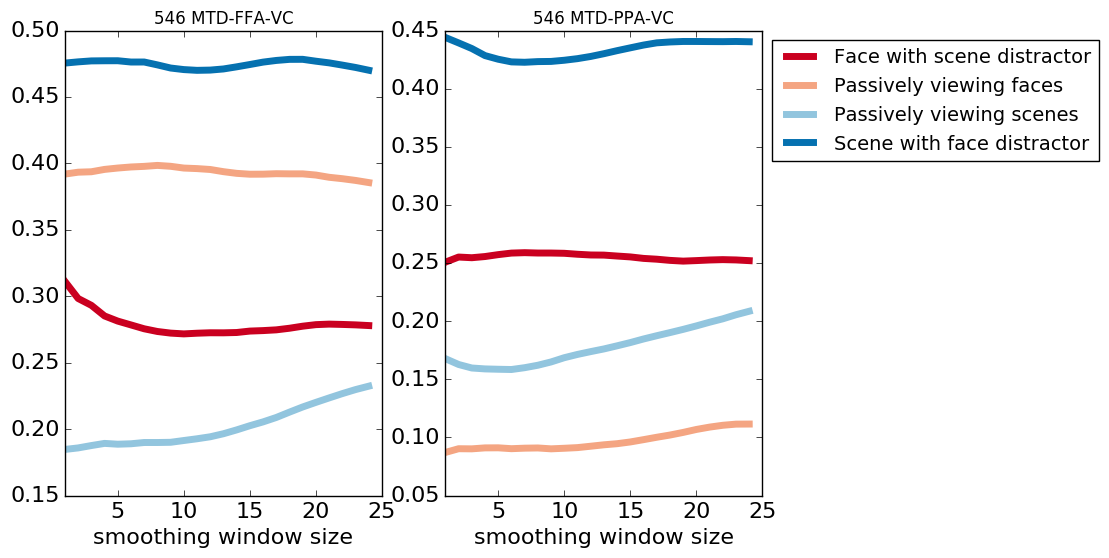

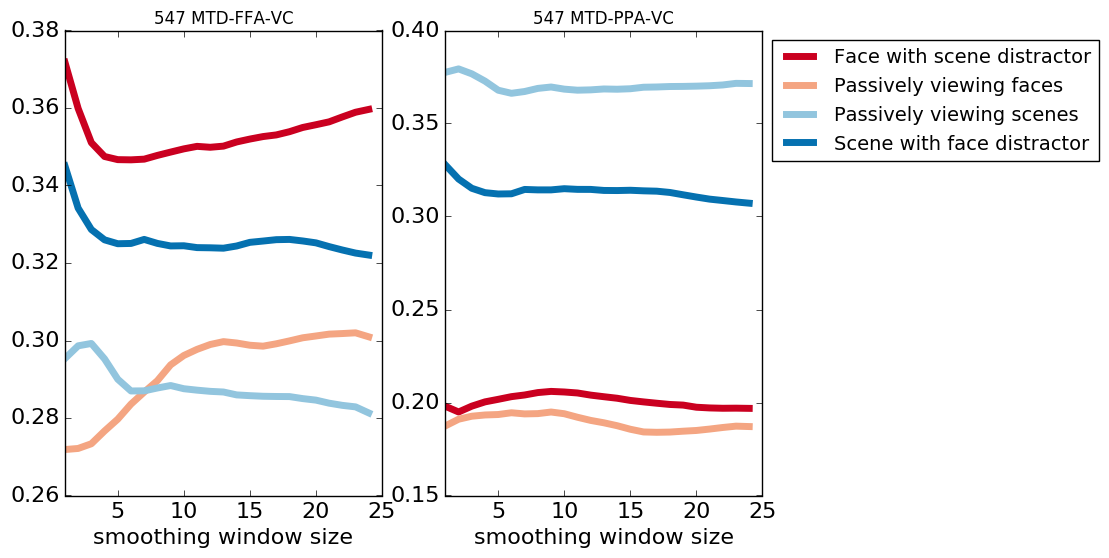

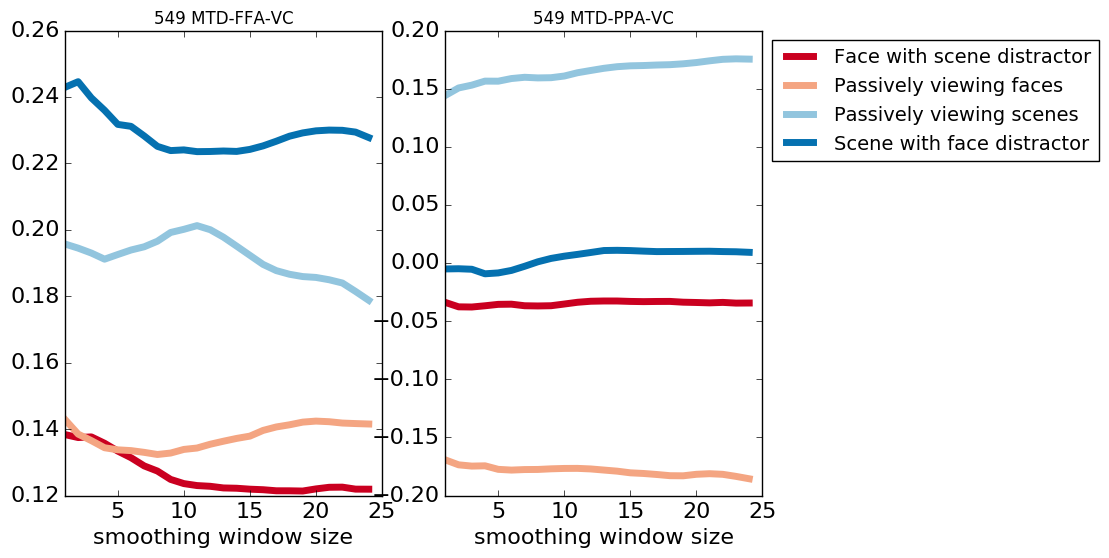

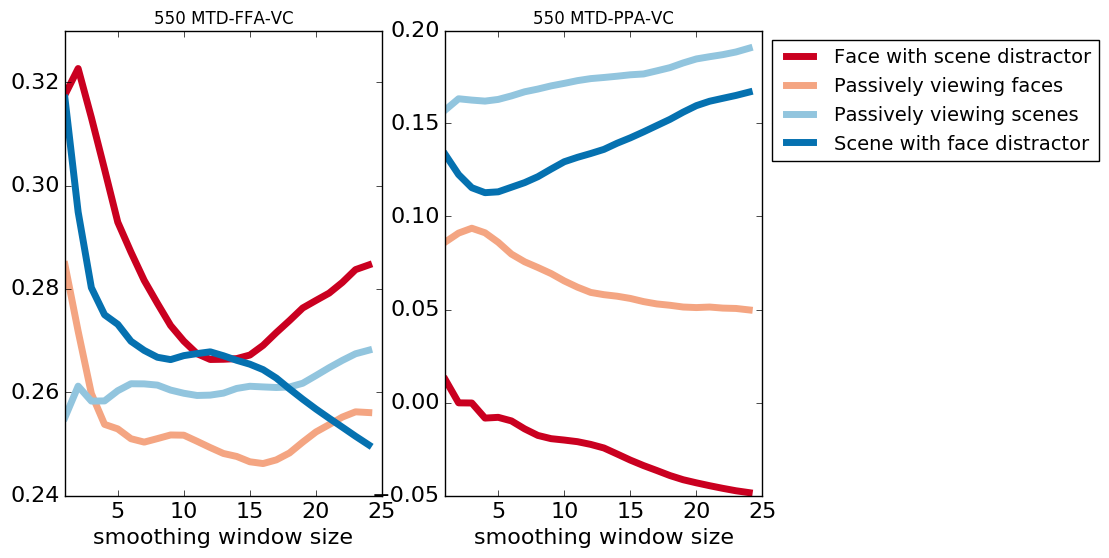

In [95]:
plt.rc('xtick', labelsize=16)  
plt.rc('ytick', labelsize=16) 
ROIpairs = ['MTD-FFA-VC', 'MTD-PPA-VC']
Conditions =['FH', 'Fp', 'Hp', 'HF']
Labels = ['Face with scene distractor', 'Passively viewing faces ', 'Passively viewing scenes', 'Scene with face distractor']
x = np.arange(1,25)
#get colormap
cmap = brewer2mpl.get_map('RdBu','diverging', 4)

for i, sub in enumerate(np.unique(stat_df['Subj'])):
    plt.figure(i)
    plt.figure(figsize=(9,6))
    for r, roi in enumerate(ROIpairs):
        ax=plt.subplot(1, 2, r+1)
    
        for i, c in enumerate(Conditions):
            y = stat_df[(stat_df['Condition']==c) & (stat_df['Subj']==sub)][roi].values
            plt.plot(x, y, color = cmap.hex_colors[i], linewidth=5  )
            ax.set_title(sub+' '+ roi)

            #plt.ylim(-0.1,0.3)
            plt.xlim(1, 25)
            plt.xlabel('smoothing window size', fontsize=16)
    plt.legend(Labels, fontsize=14, loc='outside', bbox_to_anchor=(1, 1))

In [79]:
len(PPA_ts)

85